In [1]:


import numpy as np # linear algebra
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix



In [2]:


from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler



Using TensorFlow backend.


In [3]:


train_file = "../input/train.csv"
test_file = "../input/test.csv"
output_file = "submission.csv"



In [4]:
raw_data = np.loadtxt(train_file, skiprows=1, dtype='int', delimiter=',')
x_train, x_val, y_train, y_val = train_test_split(
    raw_data[:,1:], raw_data[:,0], test_size=0.1)

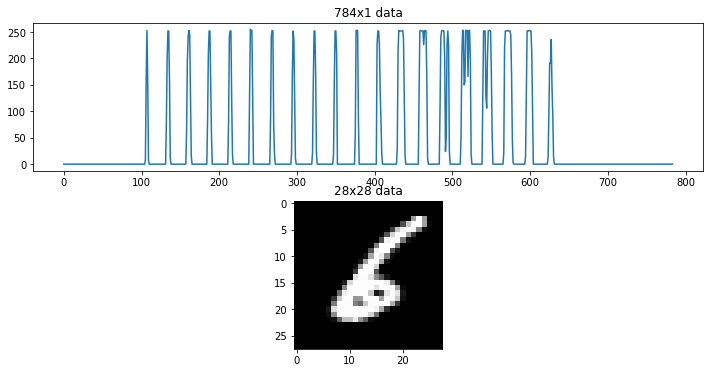

In [6]:
fig, ax = plt.subplots(2, 1, figsize=(12,6))
ax[0].plot(x_train[0])
ax[0].set_title('784x1 data')
ax[1].imshow(x_train[0].reshape(28,28), cmap='gray')
ax[1].set_title('28x28 data')

In [7]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_val = x_val.reshape(-1, 28, 28, 1)

In [8]:
x_train = x_train.astype("float32")/255.
x_val = x_val.astype("float32")/255.

In [9]:
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
#example:
print(y_train[0])

[ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]


In [10]:
model = Sequential()

model.add(Conv2D(filters = 16, kernel_size = (3, 3), activation='relu',
                 input_shape = (28, 28, 1)))
model.add(BatchNormalization())
model.add(Conv2D(filters = 16, kernel_size = (3, 3), activation='relu'))
model.add(BatchNormalization())
#model.add(Conv2D(filters = 16, kernel_size = (3, 3), activation='relu'))
#model.add(BatchNormalization())
model.add(MaxPool2D(strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation='relu'))
model.add(BatchNormalization())
#model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation='relu'))
#model.add(BatchNormalization())
model.add(MaxPool2D(strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [11]:
datagen = ImageDataGenerator(zoom_range = 0.1,
                            height_shift_range = 0.1,
                            width_shift_range = 0.1,
                            rotation_range = 10)

In [12]:
model.compile(loss='categorical_crossentropy', optimizer = Adam(lr=1e-4), metrics=["accuracy"])

In [13]:
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.9 ** x)

In [ ]:
hist = model.fit_generator(datagen.flow(x_train, y_train, batch_size=16),
                           steps_per_epoch=500,
                           epochs=30, #Increase this when not on Kaggle kernel
                           verbose=2,  #1 for ETA, 0 for silent
                           validation_data=(x_val[:400,:], y_val[:400,:]), #For speed
                           callbacks=[annealer])

Epoch 1/30
47s - loss: 0.9271 - acc: 0.7008 - val_loss: 0.4242 - val_acc: 0.8700
Epoch 2/30
43s - loss: 0.3654 - acc: 0.8885 - val_loss: 0.1677 - val_acc: 0.9525
Epoch 3/30
43s - loss: 0.2921 - acc: 0.9097 - val_loss: 0.1449 - val_acc: 0.9575
Epoch 4/30
43s - loss: 0.2293 - acc: 0.9315 - val_loss: 0.1363 - val_acc: 0.9600
Epoch 5/30
43s - loss: 0.2047 - acc: 0.9380 - val_loss: 0.1461 - val_acc: 0.9675
Epoch 6/30
43s - loss: 0.1728 - acc: 0.9486 - val_loss: 0.1081 - val_acc: 0.9775
Epoch 7/30
44s - loss: 0.1601 - acc: 0.9519 - val_loss: 0.0957 - val_acc: 0.9675
Epoch 8/30
43s - loss: 0.1521 - acc: 0.9544 - val_loss: 0.0692 - val_acc: 0.9750
Epoch 9/30
43s - loss: 0.1521 - acc: 0.9558 - val_loss: 0.0701 - val_acc: 0.9775
Epoch 10/30
46s - loss: 0.1226 - acc: 0.9621 - val_loss: 0.0624 - val_acc: 0.9800
Epoch 11/30
47s - loss: 0.1245 - acc: 0.9606 - val_loss: 0.0645 - val_acc: 0.9825
Epoch 12/30
46s - loss: 0.1310 - acc: 0.9622 - val_loss: 0.0330 - val_acc: 0.9900
Epoch 13/30
50s - loss: 0

In [15]:
final_loss, final_acc = model.evaluate(x_val, y_val, verbose=0)
print("Final loss: {0:.4f}, final accuracy: {1:.4f}".format(final_loss, final_acc))

Final loss: 0.0298, final accuracy: 0.9914


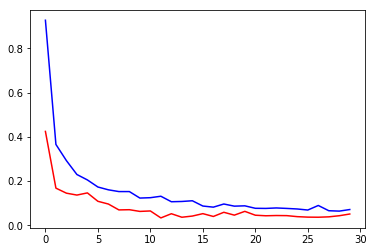

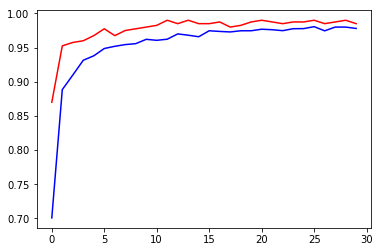

In [16]:
plt.plot(hist.history['loss'], color='b')
plt.plot(hist.history['val_loss'], color='r')
plt.show()
plt.plot(hist.history['acc'], color='b')
plt.plot(hist.history['val_acc'], color='r')
plt.show()

In [17]:
y_hat = model.predict(x_val)
y_pred = np.argmax(y_hat, axis=1)
y_true = np.argmax(y_val, axis=1)
cm = confusion_matrix(y_true, y_pred)
print(cm)

[[410   0   1   0   0   0   0   0   1   0]
 [  0 486   2   0   0   0   0   5   0   0]
 [  0   0 427   0   0   0   0   1   0   1]
 [  1   0   0 429   0   0   0   0   0   1]
 [  1   0   0   0 391   0   0   0   0   3]
 [  0   0   0   2   0 379   1   0   2   0]
 [  0   0   0   0   0   1 399   0   2   0]
 [  0   0   2   0   0   0   0 454   0   1]
 [  0   0   0   0   1   0   0   1 398   1]
 [  0   0   0   0   3   1   0   1   0 391]]


In [18]:
mnist_testset = np.loadtxt(test_file, skiprows=1, dtype='int', delimiter=',')
x_test = mnist_testset.astype("float32")
x_test = x_test.reshape(-1, 28, 28, 1)/255.

In [19]:
y_hat = model.predict(x_test, batch_size=64)

In [20]:
y_pred = np.argmax(y_hat,axis=1)

In [21]:
with open(output_file, 'w') as f :
    f.write('ImageId,Label\n')
    for i in range(len(y_pred)) :
        f.write("".join([str(i+1),',',str(y_pred[i]),'\n']))

In [22]:
print(output_file)

submission.csv


In [23]:
pwd(submission.csv)

'/kaggle/working'